# Observations
 - major part of tweets has zero compound sentiment
 - average sentiment for CNN tweets is negative, all others are positive
 - CBS tweets have highest compound average score
 - to time trend is observavable  

In [1]:
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_accounts=["@BBC","@CBSTweet","@CNN","@foxnews","@nytimes"]

In [12]:
tweets_outlet=[]
tweets_status=[]
tweets_ago=[]
tweets_datetime=[]
tweets_sentiment=[]
tweets_sentiment_neu=[]
tweets_sentiment_pos=[]
tweets_sentiment_neg=[]
tweets_df=pd.DataFrame.from_dict({"Outlet": tweets_outlet, "Text": tweets_status, "Tweets Ago": tweets_ago, "DateTime": tweets_datetime,"Sentiment": tweets_sentiment, "Sentiment Neu": tweets_sentiment_neu, "Sentiment Pos": tweets_sentiment_pos, "Sentiment Neg": tweets_sentiment_neg})

In [15]:
for target_account in target_accounts:
    tweets_outlet=[]
    tweets_status=[]
    tweets_ago=[]
    tweets_datetime=[]
    tweets_sentiment=[]
    tweets_sentiment_neu=[]
    tweets_sentiment_pos=[]
    tweets_sentiment_neg=[]
    i=0
    # load last 100 tweets, exclude retweets
    while i<100:
        if i==0:
            public_tweets = api.user_timeline(target_account, count=100)
        else:
            public_tweets = api.user_timeline(target_account, count=100, max_id=max_id)
            
        for public_tweet in public_tweets:
            if(public_tweet['text'][:2]!="RT"): # skip retweets
                tweets_outlet.append(target_account)
                tweets_status.append(public_tweet['text'])
                tweets_datetime.append(public_tweet['created_at'])
                tweets_ago.append(i)
                tweets_sentiment.append(analyzer.polarity_scores(public_tweet['text'])["compound"])
                tweets_sentiment_neu.append(analyzer.polarity_scores(public_tweet['text'])["neu"])
                tweets_sentiment_pos.append(analyzer.polarity_scores(public_tweet['text'])["pos"])       
                tweets_sentiment_neg.append(analyzer.polarity_scores(public_tweet['text'])["neg"])                  
                i=i+1
                if i==100:
                    break
        max_id=public_tweet['id']
    
    # append tweets for current media outlet to the overall data frame
    account_tweets_df=pd.DataFrame.from_dict({"Outlet": tweets_outlet, "Text": tweets_status, "Tweets Ago": tweets_ago,"DateTime": tweets_datetime, "Sentiment": tweets_sentiment, "Sentiment Neu": tweets_sentiment_neu, "Sentiment Pos": tweets_sentiment_pos, "Sentiment Neg": tweets_sentiment_neg})
    tweets_df=tweets_df.append(account_tweets_df)


In [16]:
tweets_df.to_csv(path_or_buf='tweets_data.csv')

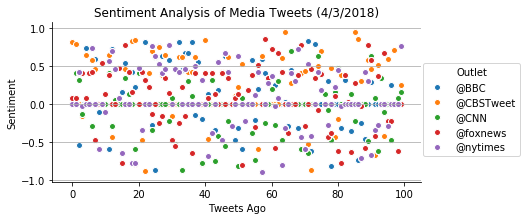

In [20]:
t = sns.pairplot(tweets_df,x_vars="Tweets Ago",y_vars="Sentiment",hue="Outlet",size=3, aspect=2)
plt.title("Sentiment Analysis of Media Tweets (4/3/2018)", fontsize=12)
plt.grid(axis="y")
plt.savefig("tweets_sentiment.png")
plt.show()

In [21]:
tweets_agg=tweets_df.groupby(by="Outlet").mean()
tweets_agg=tweets_agg.reset_index()

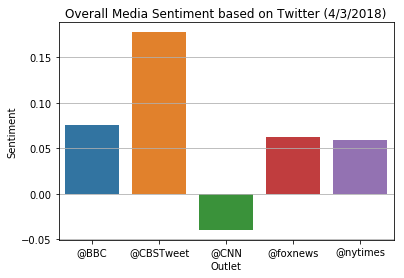

In [24]:
b = sns.barplot(data=tweets_agg,x="Outlet",y="Sentiment")
plt.title("Overall Media Sentiment based on Twitter (4/3/2018)", fontsize=12)
plt.grid(axis="y")
plt.savefig("tweets_sentiment_overall.png")
plt.show()